# Object Segmentation in Images using EEG Signals

In this notebook we will reproduce some parts of this paper https://arxiv.org/abs/1408.4363 based on these ressources: https://imatge.upc.edu/web/resources/eeg-signals-object-segmentation

## Reproduction of paper (EEG classifier)

We will first focus on training the same classifier as in the paper (Binary SVM with RBF kernel) and then see if we can get more interesting results using other classifiers.

### Data exploration

User epochs - check if each epoch is labelled 

### Binary Classifier with RBF kernel

TBD

## Next steps

TBD

In [2]:
################################
##### MNE Example use case #####
################################

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plts

import mne
from mne import io
from mne.datasets import sample

data_path = sample.data_path()

Using default location ~/mne_data for sample...
Creating ~/mne_data
[........................................] 100.00000 / ( 1.54 GB /  1.54 GB,   169 kB/s)   
Verifying hash fc2d5b9eb0a144b1d6ba84dc3b983602.
Decompressing the archive: /Users/axeluran/mne_data/MNE-sample-data-processed.tar.gz
(please be patient, this can take some time)
Successfully extracted to: ['/Users/axeluran/mne_data/MNE-sample-data']
Attempting to create new mne-python configuration file:
/Users/axeluran/.mne/mne-python.json


In [3]:
raw_fname = data_path + '/MEG/sample/sample_audvis_filt-0-40_raw.fif'
event_fname = data_path + '/MEG/sample/sample_audvis_filt-0-40_raw-eve.fif'
event_id, tmin, tmax = 1, -0.2, 0.4

# Setup for reading the raw data
raw = io.read_raw_fif(raw_fname)
events = mne.read_events(event_fname)

# Set up pick list: EEG + MEG - bad channels (modify to your needs)
raw.info['bads'] = ['MEG 2443', 'EEG 053']
picks = mne.pick_types(raw.info, meg='grad', eeg=False, stim=True, eog=True,
                       exclude='bads')

# Read epochs
epochs = mne.Epochs(raw, events, event_id, tmin, tmax, proj=True,
                    picks=picks, baseline=(None, 0), preload=True,
                    reject=dict(grad=4000e-13, eog=150e-6))

Opening raw data file /Users/axeluran/mne_data/MNE-sample-data/MEG/sample/sample_audvis_filt-0-40_raw.fif...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.
Current compensation grade : 0
72 matching events found
4 projection items activated
Loading data for 72 events and 91 original time points ...
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
9 bad epochs dropped


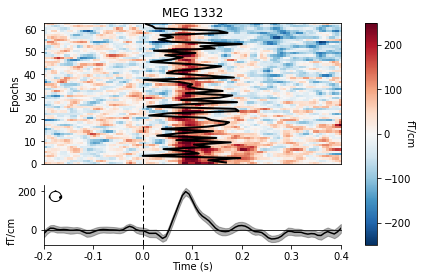

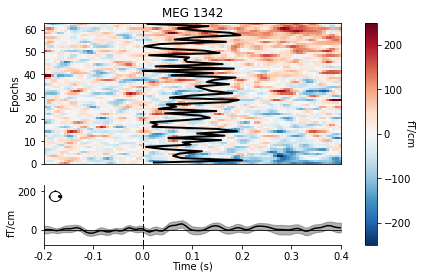

In [4]:
# and order with spectral reordering
# If you don't have scikit-learn installed set order_func to None
from sklearn.cluster.spectral import spectral_embedding  # noqa
from sklearn.metrics.pairwise import rbf_kernel   # noqa


def order_func(times, data):
    this_data = data[:, (times > 0.0) & (times < 0.350)]
    this_data /= np.sqrt(np.sum(this_data ** 2, axis=1))[:, np.newaxis]
    return np.argsort(spectral_embedding(rbf_kernel(this_data, gamma=1.),
                      n_components=1, random_state=0).ravel())

good_pick = 97  # channel with a clear evoked response
bad_pick = 98  # channel with no evoked response

# We'll also plot a sample time onset for each trial
plt_times = np.linspace(0, .2, len(epochs))

plt.close('all')
mne.viz.plot_epochs_image(epochs, [good_pick, bad_pick], sigma=.5,
                          order=order_func, vmin=-250, vmax=250,
                          overlay_times=plt_times, show=True)